In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import itertools

In [115]:
# read testing csv
df = pd.read_csv('/Users/yikaitang/Documents/GitHub/puppet_training/examples/puppet_training/testing_data/testing_puppet_testing_full_partner_selection_env_bug_fixed_switch_appearance_VarDiff_20_range0to4_baseval7to10.csv')


In [116]:
# filter out cases where both partners are equally selected
df = df[df.partner_selection != 0.5]

In [117]:
# collect 
array_selected_agent_var = {'gem': None, 'coin': None, 'bone':None}

array_nonselected_agent_var = {'gem': None, 'coin': None, 'bone':None}

for key in array_selected_agent_var.keys():
    array_selected_agent_var[key] = np.where(
        df['partner_selection'] < 0.5,
        df['partner_A_{}_var'.format(key)],
        df['partner_B_{}_var'.format(key)]
    )

    array_nonselected_agent_var[key] = np.where(
        df['partner_selection'] < 0.5,
        df['partner_B_{}_var'.format(key)],
        df['partner_A_{}_var'.format(key)]
    )

In [118]:
from scipy.stats import ttest_ind, ttest_1samp

for key in array_selected_agent_var.keys():
    t_stat, p_value = ttest_ind(
        array_selected_agent_var[key], 
        array_nonselected_agent_var[key]
        )  # use equal_var=True if variances are equal
    
    # print the condition and results
    print(f"Condition: {key}")
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")
    print(f'means', np.mean(array_selected_agent_var[key]), np.mean(array_nonselected_agent_var[key]))
    print()

Condition: gem
T-statistic: 2.120490869794859
P-value: 0.03402168835800284
means 11.822655524605386 11.172701949860723

Condition: coin
T-statistic: 2.1204038669700513
P-value: 0.0340290228911794
means 11.832869080779945 11.182915506035283

Condition: bone
T-statistic: 2.120393537959765
P-value: 0.034029893739688816
means 11.822655524605386 11.172701949860723



In [119]:
# Hypothesized population mean
mu = 0.5
sample = df['partner_selection'].dropna()

# One-sample t-test
t_stat, p_value = ttest_1samp(sample, mu)

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f'mean: {np.mean(sample):.4f}')

t-statistic: 1.0197
p-value: 0.3080
mean: 0.5039


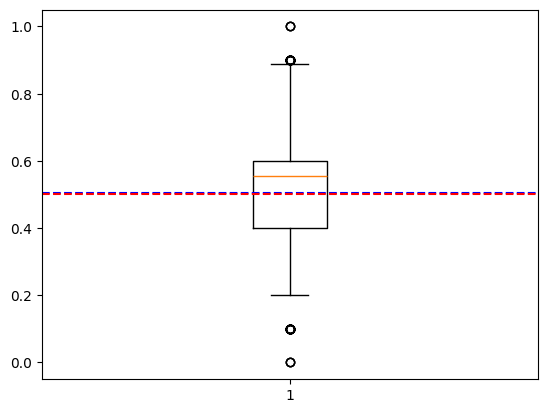

In [120]:
plt.boxplot(df['partner_selection'].dropna())
plt.axhline(y=sample.mean(), color='b', linestyle='--')
plt.axhline(y=0.5, color='r', linestyle='--')